In [1]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..'))
sys.path.insert(1, os.path.join(sys.path[0], '..'))

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats
from src import data
from portfolio_design.src import analysis as an

%matplotlib inline

In [5]:
hfi = data.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


In [22]:
df = pd.concat([
  an.var_historical(hfi).rename('historical'),
  an.var_gaussian(hfi, modified = True).rename('gaussian'),
  an.var_gaussian(hfi, modified = False).rename('cornish-fisher'),
  an.cvar_historical(hfi).rename('cvar-historical'),
], axis = 1)
df

,historical,gaussian,cornish-fisher,cvar-historical
Convertible Arbitrage,0.01576,0.025166,0.021691,0.036550
CTA Global,0.03169,0.033094,0.034235,0.041264
Distressed Securities,0.01966,0.025102,0.021032,0.036429
Emerging Markets,0.04247,0.053011,0.047164,0.072364
Equity Market Neutral,0.00814,0.010734,0.008850,0.016879
Event Driven,0.02535,0.025516,0.021144,0.038336
Fixed Income Arbitrage,0.00787,0.017881,0.014579,0.028257
Global Macro,0.01499,0.013581,0.018766,0.020629
Long/Short Equity,0.02598,0.027935,0.026397,0.041943
Merger Arbitrage,0.01047,0.012612,0.010435,0.019143


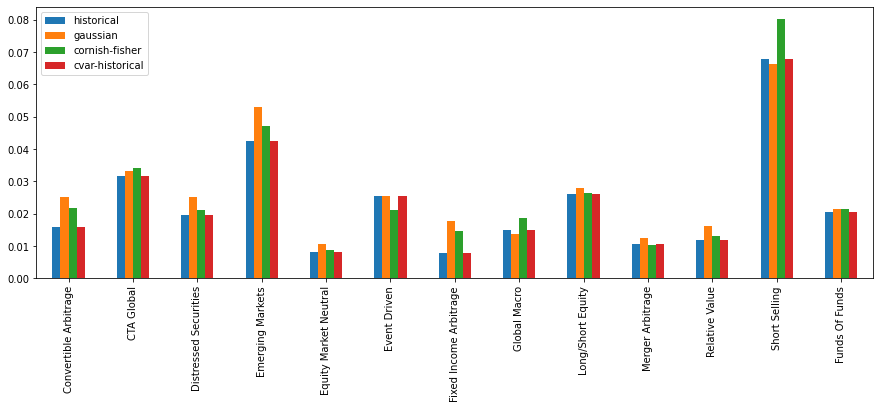

In [19]:
df.plot(kind = 'bar', figsize = (15, 5));